In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from data_loader import load_data_for

In [38]:
# Import All Model Data
lr_model_results = load_data_for('logistic_regression')
rf_model_results = load_data_for('random_forest_classifier')
svc_model_results = load_data_for('support_vector_classifier')
xgbc_model_results = load_data_for('xgb_classifier')

# NOTE: Each dictionary contains the following keys: 
# 'best_estimators', 'best_scores', 'baseline_scores', 'X_test_unpreprocessed', 'X_test_preprocessed', 'y_test', 'predicted_labels'

In [80]:
assert lr_model_results['baseline_scores'] == rf_model_results['baseline_scores'] == svc_model_results['baseline_scores'] == xgbc_model_results['baseline_scores']

test_scores_df = pd.DataFrame({
    'F2 Baseline': lr_model_results['baseline_scores'],
    'Logistic Regression': lr_model_results['best_scores'],
    'Random Forest Clasifier': rf_model_results['best_scores'],
    'Support Vector Classifier': svc_model_results['best_scores'],
    'XGBoost Classifier': xgbc_model_results['best_scores']
})

print(test_scores_df, end = '\n\n')
print(test_scores_df.mean(axis = 0), end = '\n\n')
print(test_scores_df.std(axis = 0), end = '\n\n')

   F2 Baseline  Logistic Regression  Random Forest Clasifier  \
0     0.789157             0.977156                 0.992907   
1     0.789157             0.977191                 0.992775   
2     0.789157             0.976719                 0.993092   
3     0.789157             0.976736                 0.993106   
4     0.789157             0.976854                 0.993779   

   Support Vector Classifier  XGBoost Classifier  
0                   0.993884            0.997345  
1                   0.993985            0.997196  
2                   0.994020            0.997473  
3                   0.993892            0.997097  
4                   0.993405            0.997067  

F2 Baseline                  0.789157
Logistic Regression          0.976931
Random Forest Clasifier      0.993132
Support Vector Classifier    0.993837
XGBoost Classifier           0.997236
dtype: float64

F2 Baseline                  0.000000
Logistic Regression          0.000228
Random Forest Clasifier   

#### Which ML model is the most predictive?

Clearly, the XGBoost Classifier is the best model of the alternatives. With a mean test score (using the F2 metric) of 0.997236 and corresponding standard deviation of 0.000171 (which is the lowest of all of the models), this classifier is clearly superior to SVC, RFC, and LogR.  

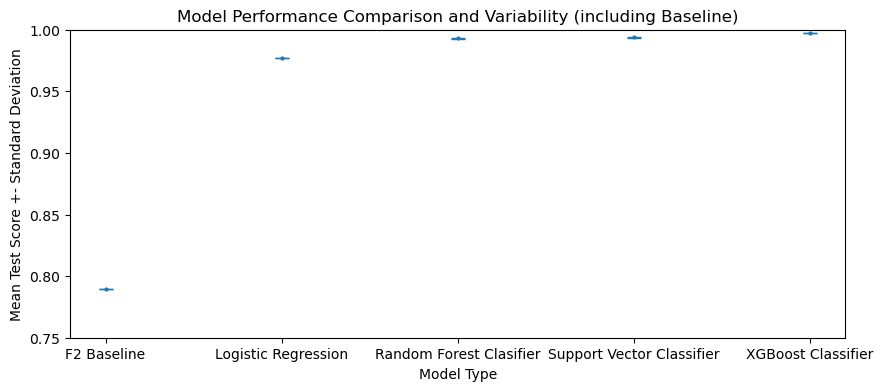

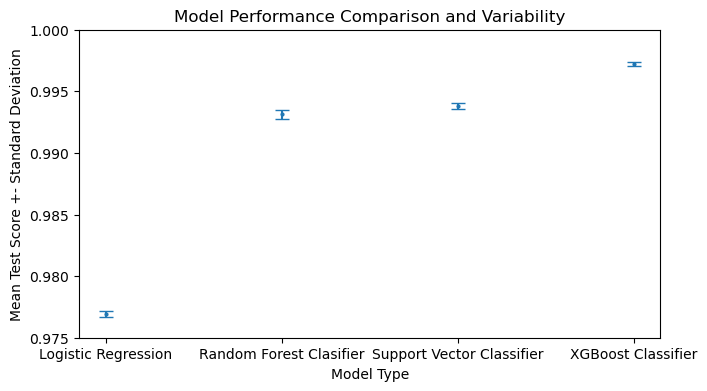

In [81]:
plt.figure(figsize = (10, 4))
plt.errorbar(x = test_scores_df.columns, y = test_scores_df.mean(axis = 0), yerr = test_scores_df.std(axis = 0), fmt = 'o', markersize = 2, capsize = 5)
plt.ylim(0.75, 1)
plt.xlabel('Model Type')
plt.ylabel('Mean Test Score +- Standard Deviation')
plt.title('Model Performance Comparison and Variability (including Baseline)')
plt.show()

plt.figure(figsize = (7.5, 4))
plt.errorbar(x = test_scores_df.columns[1:], y = test_scores_df.mean(axis = 0).iloc[1:], yerr = test_scores_df.std(axis = 0).iloc[1:], fmt = 'o', markersize = 2, capsize = 5)
plt.ylim(0.975, 1)
plt.xlabel('Model Type')
plt.ylabel('Mean Test Score +- Standard Deviation')
plt.title('Model Performance Comparison and Variability')
plt.show()

#### How many standard deviations above the baseline is the best model --> XGBoost Classifier?

The baseline score is always 0.789157, making that the mean baseline score.

The XGBoost Classifier mean score is 0.997236, with a standard deviation of 0.000171.

The difference between the two mean baseline scores is 0.997236 - 0.789157 = 0.208079.

The amount of standard deviations (of the XGBoost Classifier) between these two scores is thus 0.208079 / 0.000171 = 1216.83625731.

**Therefore, the best model is ~1216.84 standard deviations above the baseline.**